In [ ]:
#DATASET LINK
#https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#stats about data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X =df.drop(columns=['Outcome'])
Y=df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)

In [10]:
print(x_train.shape)
print(x_test.shape)

(576, 8)
(192, 8)


In [11]:
y_test.value_counts()

0    132
1     60
Name: Outcome, dtype: int64

In [12]:
y_train.value_counts()

0    368
1    208
Name: Outcome, dtype: int64

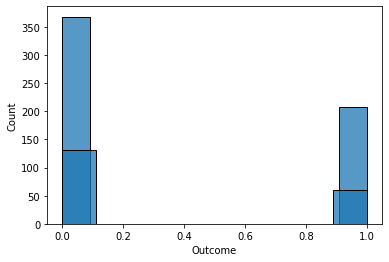

In [19]:
import seaborn as sns
sns.histplot(y_train)
sns.histplot(y_test)

# Z-test


In [13]:
from statsmodels.stats.weightstats import ztest as ztest  

In [14]:
ztest(y_test,y_train,value=0)

(-1.2234417430006668, 0.2211628951649509)

In [15]:
def results(p):
  if(p['p_value']<0.05):p['hypothesis_accepted'] = 'alternative'
  if(p['p_value']>=0.05):p['hypothesis_accepted'] = 'null'

  df=pd.DataFrame(p,index=[''])
  cols =['value1','value2','score','p_value','hypothesis_accepted']
  return df[cols]

In [17]:
p = {}
p['value1'],p['value2']=y_train.mean(),y_test.mean()
p['score'],p['p_value'] = ztest(y_train,y_test,alternative='two-sided')
results(p)

,value1,value2,score,p_value,hypothesis_accepted
,0.361111,0.3125,1.223442,0.221163,null
